In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

# Load the Data:

In [141]:
data=pd.read_csv("../input/iris-flower-dataset/IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [142]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [143]:
data.shape

(150, 5)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Converting the object type to Int form:

In [145]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data["species"]=data[["species"]].apply(label.fit_transform)

In [146]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [147]:
data["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

# Split the data:

In [148]:
x=data.drop(["species"],1)
y=data["species"]

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.30,random_state=1)

# Builidng the Model:

Decision Tree Algorithm:

In [150]:
from sklearn.tree import DecisionTreeClassifier
DTMachine=DecisionTreeClassifier()
DTMachine.fit(x_train,y_train)

DecisionTreeClassifier()

In [151]:
Pred=DTMachine.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Decision Tree Score:",accuracy_score(y_test,Pred)*100)
confusion_matrix(y_test,Pred)

Decision Tree Score: 97.14285714285714


array([[33,  0,  0],
       [ 0, 33,  2],
       [ 0,  1, 36]])

In [152]:
print(classification_report(y_test,Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      0.94      0.96        35
           2       0.95      0.97      0.96        37

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



Random Forest Algorithm:

In [153]:
from sklearn.ensemble import RandomForestClassifier
RFmachine=RandomForestClassifier()
RFmachine.fit(x,y)

RandomForestClassifier()

In [154]:
RFPred=RFmachine.predict(x)
print("Random Forest Score:",accuracy_score(y,RFPred)*100)
confusion_matrix(y,RFPred)

Random Forest Score: 100.0


array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [155]:
print(classification_report(y,RFPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



# Buiding ANN model:

In [156]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Activation

In [157]:
from keras.utils import to_categorical
Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [176]:
machine=Sequential()
machine.add(Dense(16,input_dim=4,activation="relu"))
machine.add(Dense(32,activation="relu"))
machine.add(Dense(3,activation="softmax"))
machine.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])
machine.fit(x_train,Y_train,epochs=93,verbose=1)


Epoch 1/93
2/2 [==============================] - 0s 4ms/step - loss: 1.1026 - acc: 0.3977
Epoch 2/93
2/2 [==============================] - 0s 4ms/step - loss: 1.0790 - acc: 0.3977
Epoch 3/93
2/2 [==============================] - 0s 3ms/step - loss: 1.0682 - acc: 0.3664
Epoch 4/93
2/2 [==============================] - 0s 3ms/step - loss: 1.0419 - acc: 0.4926
Epoch 5/93
2/2 [==============================] - 0s 3ms/step - loss: 1.0301 - acc: 0.6127
Epoch 6/93
2/2 [==============================] - 0s 3ms/step - loss: 1.0191 - acc: 0.7894
Epoch 7/93
2/2 [==============================] - 0s 2ms/step - loss: 1.0069 - acc: 0.9095
Epoch 8/93
2/2 [==============================] - 0s 2ms/step - loss: 0.9960 - acc: 0.9852
Epoch 9/93
2/2 [==============================] - 0s 3ms/step - loss: 0.9861 - acc: 0.9600
Epoch 10/93
2/2 [==============================] - 0s 3ms/step - loss: 0.9731 - acc: 0.9600
Epoch 11/93
2/2 [==============================] - 0s 2ms/step - loss: 0.9638 - acc: 0.98

In [177]:
machine.evaluate(x_test,Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.4182 - acc: 0.9714


[0.41823092103004456, 0.9714285731315613]

In [181]:
ANNPred=machine.predict_classes(x)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [182]:
confusion_matrix(y,ANNPred)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  0, 50]])

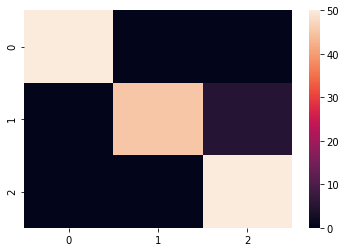

In [185]:
sn.heatmap(confusion_matrix(y,ANNPred))
plt.show()

In [186]:
print(classification_report(y,ANNPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.90      0.95        50
           2       0.91      1.00      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

